## Importar librerías

In [1]:
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

#### Carga base de datos

In [2]:
# Ruta de la carpeta que contiene los archivos
ruta = r'C:\Users\Aleja\OneDrive\Escritorio\Cartera\Proyecto - Análisis exploratorio\Proyección de Vencimientos 30062024.xlsx'

# Concatenar todos los DataFrames en uno solo
df = pd.read_excel(ruta)

In [3]:
#Organizar por código
df = df.sort_values(by="codigo")

In [4]:
# Mostrar las primeras filas del DataFrame combinado
print(df.head(5))

            codigo                       nombre   cu     documento  \
465  00120043775-2  DILSON DE SOUZA, NASCIMENTO  1.0  FC-000686-04   
464  00120043775-2  DILSON DE SOUZA, NASCIMENTO  1.0  FC-000686-03   
463  00120043775-2  DILSON DE SOUZA, NASCIMENTO  1.0  FC-000686-02   
417    01229757236       DA SILVA GUIDA, ANDREA  1.0  FE-024916-03   
416    01229757236       DA SILVA GUIDA, ANDREA  1.0  FE-024916-02   

         fec_ela     fec_vcto  dias_vcto  sin_vencer  _01_30  _31_60  _61_90  \
465  2022-DIC-31  2018-JUL-22       2170           0       0       0       0   
464  2022-DIC-31  2018-JUN-22       2200           0       0       0       0   
463  2022-DIC-31  2018-MAY-22       2231           0       0       0       0   
417  2024-JUN-29  2024-SEP-15        -77      339000       0       0       0   
416  2024-JUN-29  2024-AGO-15        -46      339000       0       0       0   

     mas_de_90  vend_tmp    total  
465     125000       NaN   375000  
464     125000       NaN  

In [5]:
# Mostrar las últimas filas filas del DataFrame combinado
print(df.tail(5))

     codigo                               nombre  cu documento fec_ela  \
1761    NaN                                  NaN NaN       NaN     NaN   
1762    NaN  Empresa:CREDITOS PARRA Y CIA S.A.S. NaN       NaN     NaN   
1763    NaN  Cuenta:130515   Cartera de clientes NaN       NaN     NaN   
1764    NaN                              General NaN       NaN     NaN   
1765    NaN               2024.08.06 04:11:35 PM NaN       NaN     NaN   

     fec_vcto  dias_vcto  sin_vencer  _01_30  _31_60  _61_90  mas_de_90  \
1761      NaN          0           0       0       0       0          0   
1762      NaN          0           0       0       0       0          0   
1763      NaN          0           0       0       0       0          0   
1764      NaN          0           0       0       0       0          0   
1765      NaN          0           0       0       0       0          0   

      vend_tmp  total  
1761       NaN      0  
1762       NaN      0  
1763       NaN      0  
1764    

In [6]:
# Visualizar estructura del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1766 entries, 465 to 1765
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   codigo      1431 non-null   object 
 1   nombre      1436 non-null   object 
 2   cu          1431 non-null   float64
 3   documento   1431 non-null   object 
 4   fec_ela     1431 non-null   object 
 5   fec_vcto    1431 non-null   object 
 6   dias_vcto   1766 non-null   int64  
 7   sin_vencer  1766 non-null   int64  
 8   _01_30      1766 non-null   int64  
 9   _31_60      1766 non-null   int64  
 10  _61_90      1766 non-null   int64  
 11  mas_de_90   1766 non-null   int64  
 12  vend_tmp    1084 non-null   float64
 13  total       1766 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 207.0+ KB


In [7]:
# Eliminar columnas innecesarias
df = df.drop(columns=['nombre', 'cu', 'vend_tmp'], index=1)

In [8]:
# Visualizar estructura del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1765 entries, 465 to 1765
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   codigo      1431 non-null   object
 1   documento   1431 non-null   object
 2   fec_ela     1431 non-null   object
 3   fec_vcto    1431 non-null   object
 4   dias_vcto   1765 non-null   int64 
 5   sin_vencer  1765 non-null   int64 
 6   _01_30      1765 non-null   int64 
 7   _31_60      1765 non-null   int64 
 8   _61_90      1765 non-null   int64 
 9   mas_de_90   1765 non-null   int64 
 10  total       1765 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 165.5+ KB


In [9]:
# Ver na por columna
df.isna().sum()

codigo        334
documento     334
fec_ela       334
fec_vcto      334
dias_vcto       0
sin_vencer      0
_01_30          0
_31_60          0
_61_90          0
mas_de_90       0
total           0
dtype: int64

In [10]:
# Eliminar n/a
df = df.dropna()

In [11]:
# Ver na por columna
df.isna().sum()

codigo        0
documento     0
fec_ela       0
fec_vcto      0
dias_vcto     0
sin_vencer    0
_01_30        0
_31_60        0
_61_90        0
mas_de_90     0
total         0
dtype: int64

In [12]:
# Revisar distribución
df['total'].value_counts()

total
0          1104
900000        3
238000        3
280000        3
836000        2
           ... 
2328300       1
2798000       1
925000        1
3398000       1
888000        1
Name: count, Length: 300, dtype: int64

In [13]:
# Eliminar valores en 0
df = df.loc[df['total'] != 0]
df['total'].value_counts()

total
900000     3
238000     3
280000     3
836000     2
394000     2
          ..
2328300    1
2798000    1
925000     1
3398000    1
375000     1
Name: count, Length: 299, dtype: int64

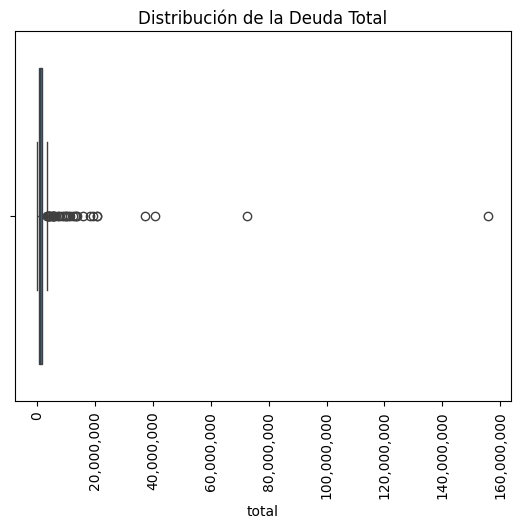

In [14]:
sns.boxplot(x=df['total'])
plt.title('Distribución de la Deuda Total')
# Configurar el formato del eje x para mostrar valores en formato normal
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
# Asegurarse de que las etiquetas del eje x sean horizontales
plt.xticks(rotation=90)
plt.show()

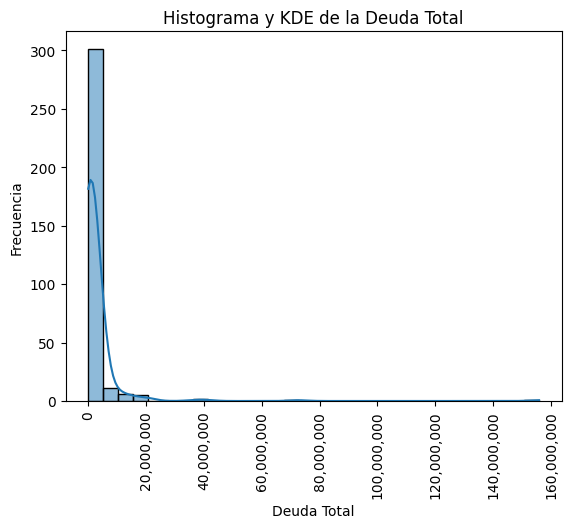

In [15]:
sns.histplot(df['total'], kde=True, bins=30)
plt.title('Histograma y KDE de la Deuda Total')
plt.xlabel('Deuda Total')
plt.ylabel('Frecuencia')
# Configurar el formato del eje x para mostrar valores en formato normal
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
# Asegurarse de que las etiquetas del eje x sean horizontales
plt.xticks(rotation=90)
plt.show()

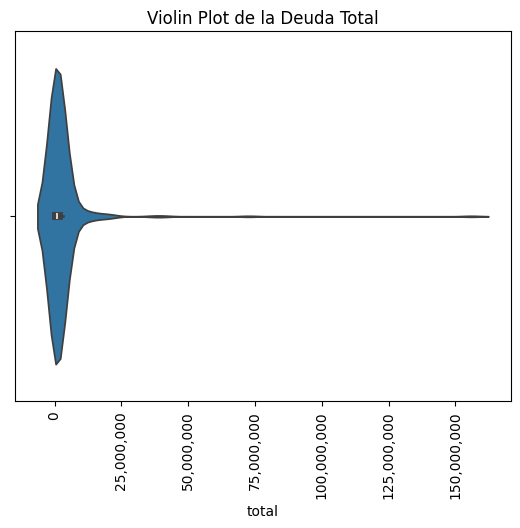

In [16]:
sns.violinplot(x=df['total'])
plt.title('Violin Plot de la Deuda Total')
# Configurar el formato del eje x para mostrar valores en formato normal
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
# Asegurarse de que las etiquetas del eje x sean horizontales
plt.xticks(rotation=90)
plt.show()

In [17]:
Q1 = df['total'].quantile(0.25)
Q3 = df['total'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['total'] < (Q1 - 1.5 * IQR)) | (df['total'] > (Q3 + 1.5 * IQR))]
print(f"Outliers detectados: {len(outliers)}")

Outliers detectados: 34


In [18]:
mediana = df['total'].median()
print(f"Mediana: {mediana}")

Mediana: 836000.0


In [19]:
varianza = df['total'].var()
desviacion_estandar = df['total'].std()
print(f"Varianza: {varianza}, Desviación Estándar: {desviacion_estandar}")

Varianza: 105034663607404.45, Desviación Estándar: 10248642.037236175


In [20]:
coef_var = df['total'].std() / df['total'].mean()
print(f"Coeficiente de Variación: {coef_var}")

Coeficiente de Variación: 3.9116991049586916


In [21]:
asimetria = df['total'].skew()
print(f"Asimetría: {asimetria}")

Asimetría: 11.667714588550378
